In [1]:
from math import *
def f(x):
    return abs(cos(x))**0.5 + sin(2+3*x)

In [29]:
def bsm_mcs_valuation(strike):
    import numpy as np
    S0 = 100.; T = 1.0; r = 0.05; vola = 0.2
    M = 50; I = 20000
    dt = T / M
    rand = np.random.standard_normal((M + 1, I))
    S = np.zeros((M + 1, I)); S[0] = S0
    for t in range(1, M + 1):
        S[t] = S[t-1] * np.exp((r - 0.5 * vola ** 2) * dt+ vola * np.sqrt(dt) * rand[t])
    value = (np.exp(-r * T)* np.sum(np.maximum(S[-1] - strike, 0)) / I)
    return value

In [30]:
def seq_value(n):
    strikes = np.linspace(80, 120, n)
    option_values = []
    for strike in strikes:
        option_values.append(bsm_mcs_valuation(strike))
    return strikes, option_values

In [31]:
n = 100 # number of options to be valued
%time strikes, option_values_seq = seq_value(n)

Wall time: 8.51 s


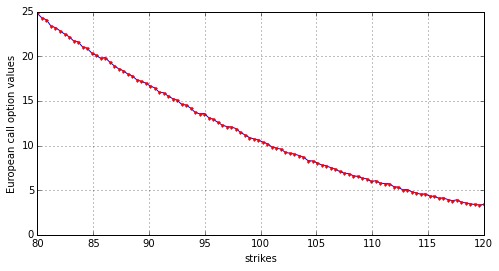

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.plot(strikes, option_values_seq, 'b')
plt.plot(strikes, option_values_seq, 'r.')
plt.grid(True)
plt.xlabel('strikes')
plt.ylabel('European call option values')

In [6]:
import numpy as np
a_np = np.arange(I)
def f4(a):
    return (np.abs(np.cos(a)) ** 0.5 + np.sin(2 + 3 * a))

In [7]:
import numexpr as ne
def f5(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(1)
    return ne.evaluate(ex)

In [8]:
def f6(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(16)
    return ne.evaluate(ex)

In [ ]:
%%time
r1 = f1(a_py)
r2 = f2(a_py)
r3 = f3(a_py)
r4 = f4(a_np)
r5 = f5(a_np)
r6 = f6(a_np)

In [ ]:
np.allclose(r1, r6)

In [9]:
import futures_charts.futures_curve as fc
func_list = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
data_list = ['a_py', 'a_py', 'a_py', 'a_np', 'a_np', 'a_np']
fc.perf_comp_data(func_list, data_list)

function: f1, av. time sec: %9.5f, relative: %6.1f (0.7769708394037046, 1.0)
function: f2, av. time sec: %9.5f, relative: %6.1f (0.684531716554292, 0.8810262648719789)
function: f3, av. time sec: %9.5f, relative: %6.1f (16.59156431427272, 21.354166041811958)
function: f4, av. time sec: %9.5f, relative: %6.1f (0.0641295192545428, 0.08253787143898444)
function: f5, av. time sec: %9.5f, relative: %6.1f (0.07376715010799728, 0.09494198027381665)
function: f6, av. time sec: %9.5f, relative: %6.1f (0.023891188218987242, 0.03074914399274343)


In [11]:
import numpy as np
np.zeros((3,3),dtype=np.float64,order='C')

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [13]:
x = np.random.standard_normal((3, 1500000))
C = np.array(x, order='C')
F = np.array(x, order='F')
x=0

In [20]:
%timeit C.sum(axis=0)

10 loops, best of 3: 23.9 ms per loop


In [21]:
%timeit C.sum(axis=1)

100 loops, best of 3: 6.69 ms per loop


In [24]:
%timeit C.std(axis=0)

10 loops, best of 3: 106 ms per loop


In [23]:
%timeit C.std(axis=1)

10 loops, best of 3: 54.4 ms per loop


In [25]:
%timeit F.sum(axis=0)

10 loops, best of 3: 37.3 ms per loop


In [26]:
%timeit F.sum(axis=1)

10 loops, best of 3: 41 ms per loop


In [27]:
%timeit F.std(axis=0)

10 loops, best of 3: 139 ms per loop


In [28]:
%timeit F.std(axis=1)

10 loops, best of 3: 135 ms per loop


In [ ]:
vs.info()

In [ ]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [ ]:
data = data.fillna(method='ffill')
data.info()

In [ ]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [ ]:
rets = np.log(data / data.shift(1))
rets.head()

In [ ]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))

In [ ]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat[1:-2], x=xdat[1:-2])
model

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xdat, ydat, 'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')

In [ ]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
window=252).plot(grid=True, style='b')

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [ ]:
import opportunity_constructs.utilities as ocu
aligned_output = ocu.get_aligned_futures_data(contract_list=['NGU2016','NGX2016','NGF2017'],aggregation_method=12,contracts_back=10,date_to=20160218)
#aligned_output = ocu.get_aligned_futures_data(contract_list=['HOV2007','HOX2007'],aggregation_method=12,contracts_back=10,date_to=20070420)
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']
#bf_price = aligned_data['c1']['close_price']-aligned_data['c2']['close_price']
#bf_price_recent = bf_price[1:]
#aligned_data_recent = aligned_data[1:]
import matplotlib.pyplot as plt
plt.plot(bf_price)
plt.grid()         
         
plt.show()

In [ ]:
import read_exchange_files.process_cme_options as pco
selected_frame = pco.process_cme_options_4ticker(ticker='CDF2017',report_date=20160303)
ticker='ECF2017'
#selected_frame[(selected_frame['ticker'] == ticker)&(selected_frame['option_type'] == 'C')]
selected_frame

In [ ]:
import os.path
import shared.directory_names as dn
options_data_dir = dn.get_dated_directory_extension(folder_date=20160226, ext='raw_options_data')
options_data_dir
file_name='commodity'

os.path.isfile(options_data_dir + '/' + file_name + '_formatted_.pkl')

options_data_dir + '/' + file_name + '_formatted_.pkl'

In [ ]:
import signals.imp_vol as siv
skew_output = siv.calc_delta_vol_4ticker(ticker='ECK2016',settle_date=20160318,delta=0.5)

skew_output


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(skew_output['delta'],skew_output['imp_vol'])
plt.grid()         
         
plt.show()

In [ ]:
from scipy.interpolate import interp1d

%time f = interp1d(skew_output['delta'],skew_output['imp_vol'])
%time f2 = interp1d(skew_output['delta'],skew_output['imp_vol'],kind='cubic')
print(f(0.5))
print(f2(0.5))

#skew_output['imp_vol']

In [ ]:
import opportunity_constructs.spread_carry as sc

spread_carry_output = sc.generate_spread_carry_sheet_4date(report_date=20160323)
spread_report = spread_carry_output['spread_report']
ticker_head_list = list(spread_report['tickerHead'].unique())
# Compare BO and S sizing

spread_report[spread_report['tickerHead']==ticker_head_list[19]]
#spread_report[spread_report['tickerHead']=='CC']

In [ ]:
from openpyxl import Workbook
wb=Workbook()
ws=wb.active
ws['A1']='=CMED.MD(1|G|XCME:F:ES:201606,"LastTradePrice")'

ws['A1'].value
wb.save("formula.xlsx")

In [ ]:
ticker_head_list = ['ED', 'C', 'S', 'SM', 'BO', 'W', 'KW', 'LC', 'LN', 'FC',
                        'ES', 'NQ', 'AD', 'CD', 'EC', 'JY', 'BP',
                        'FV', 'TU', 'TY', 'US', 'GC', 'SI', 'CL', 'NG', 'HO', 'RB']

import contract_utilities.contract_meta_info as cmi
new_list = cmi.cme_futures_tickerhead_list

set(ticker_head_list)-set(new_list)

In [ ]:
import read_exchange_files.process_cme_futures as pcf
import read_exchange_files.read_cme_files as rcf
cme_output = pcf.process_cme_futures_4tickerhead(ticker_head='RB', report_date=20160225)
#data_read_out = rcf.read_cme_future_settle_csv_files(file_name='nymex_futures', report_date=20160224)
#title_frame = data_read_out['title_frame']
#title_frame
#title_frame[title_frame['ticker_head']=='LN']

#data_read_out[data_read_out['ticker_head']=='CL']

#data_read_out['month_strike_list'][68]
cme_output['settle_frame']

In [ ]:
import get_price.get_futures_price as gfp
import shared.calendar_utilities as cu
import contract_utilities.expiration as exp
price_frame = gfp.get_futures_price_preloaded(ticker_head='ED',settle_date=20160225)
price_frame.sort('tr_dte',ascending=True,inplace=True)


exp_date = 20170225


exp_datetime = cu.convert_doubledate_2datetime(exp_date)

price_frame['exp_date'] = [exp.get_futures_expiration(x) for x in price_frame['ticker']]
price_frame = price_frame[price_frame['exp_date']<exp_datetime]

price_frame['implied_rate'] = 100-price_frame['close_price']

price_frame[['implied_rate','exp_date','cal_dte']]


In [ ]:
[1+(price_frame['implied_rate'].iloc[x]*(price_frame['cal_dte'].iloc[x+1]-price_frame['cal_dte'].iloc[x])/36500) for x in range(len(price_frame.index)-1)]

1+(price_frame['implied_rate'].iloc[0]*price_frame['cal_dte'].iloc[0]/365000)


1+((price_frame['implied_rate'].iloc[-1]*((exp_datetime-price_frame['exp_date'].iloc[-1].to_datetime()).days))/365000)


In [ ]:
import interest_curve.get_rate_from_stir as grfs
wuhu = grfs.get_simple_rate(as_of_date=20160216,date_to=20160718)

print(wuhu['rate_output'])

wuhu['price_frame']



In [ ]:
import numpy as np
print(wuhu['middle_discount'])

print(wuhu['total_discount'])

print(wuhu['first_rate'])
print(wuhu['first_period'])

print(wuhu['last_rate'])
print(wuhu['last_period'])

print(wuhu['total_period'])

print(np.prod(np.array(wuhu['middle_discount'])))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500)))
print((1+(wuhu['last_rate']*wuhu['last_period']/36500)))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500))*
      (1+(wuhu['last_rate']*wuhu['last_period']/36500))*
     np.prod(np.array(wuhu['middle_discount'])))

In [ ]:
import get_price.presave_price as pp
pp.generate_and_update_futures_data_files(ticker_head_list='cme_futures')
#data_out = pp.generate_and_update_futures_data_file_4tickerhead(ticker_head='B')
#data_out[data_out['ticker']=='BZ2016']

In [ ]:

import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
import futures_charts.futures_curve as fc
bf_signals_output = fc.get_butterfly_scatter_plot(report_date=report_date,id=195)

In [ ]:
aligned_output = bf_signals_output['aligned_output']
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']

In [ ]:
import matplotlib.pyplot as plt
plt.plot(bf_price)
plt.grid()         
         
plt.show()

In [ ]:
bad_data = aligned_data[bf_price<-0.004]   #<-0.03
bad_data

# HOV2007,HOX2007, HOZ2007 20070213 to 20070413

In [ ]:
aligned_data.iloc[1047]

In [ ]:
import shared.directory_names as dn
options_data_dir = dn.get_dated_directory_extension(folder_date=20160208,ext='comex_options_csv_address')
options_data_dir

In [ ]:
import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
report_date

In [ ]:
import scheduled_jobs.options_data_load_job as odlj
import shared.downloads as sd
sd.download_csv_from_web(web_address=odlj.comex_options_csv_address)


In [ ]:
import scheduled_jobs.options_data_load_job

In [ ]:
with open(r'C:\Research\data\options_data_raw\2016\201602\20160208\interest_rate.pkl','rb') as handle:
    wuhu = pickle.load(handle)

In [ ]:
scatter_matrix = np.zeros((3,3))

for i in range(all_samples.shape[1]):
    scatter_matrix +=(all_samples[:,i].reshape(3,1)).dot(
    (all_samples[:,i].reshape(3,1)-mean_vector).T)
print('Scatter Matrix\n',scatter_matrix)    

In [ ]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),
                                         eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [ ]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
transformed
matrix_w

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merged_dataframe.index,(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-
         merged_dataframe['BOK2016']['close_price'])
         
         
plt.show()

In [ ]:
(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-merged_dataframe['BOK2016']['close_price']

In [ ]:


import matplotlib.pyplot as plt
plt.plot(range(len(aligned_dataframe.index)),aligned_dataframe['c1']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c2']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c3']['tr_dte'])
plt.grid()         
         
plt.show()

    

    

In [ ]:
merged_dataframe['c1']['tr_dte'].isnull().sum()
merged_dataframe['c3']['tr_dte'].isnull().sum()

In [ ]:
futures_dataframe

In [ ]:
print(trDte1)
print(trDte2)
print(trDte3)

In [ ]:
bf_price = (aligned_dataframe['c1']['close_price']+aligned_dataframe['c3']['close_price'])/2-aligned_dataframe['c2']['close_price']

In [ ]:
plt.plot(range(len(aligned_dataframe.index)),bf_price)
plt.grid()         
         
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(price_ratio)
plt.grid()
plt.show()

In [ ]:
import numpy as np
nan_matrix = np.empty((2,2))
nan_matrix[:] = np.NAN
nan_matrix